<a href="https://colab.research.google.com/github/Anantha-Rao12/Peptides-against-Cerebral-Malaria/blob/master/md_csv_analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def csv_preprocessor(csv_file): 

    ''' This function processes the .csv file obtained from PDB_centroid_analyser.
    It takes the path of the csv file as input and performs some feature 
    engineering and removes any unwanted columns and sorts it by timeframe '''

    df = pd.read_csv(csv_file)
    df = df[['Filename','Distance']]
    df['timeframe'] = df.Filename.apply(lambda x : x.split('.')[0][3:])
    df['timeframe'] = df['timeframe'].apply(lambda x : str(x).zfill(3))
    df["timeframe"] = pd.to_numeric(df["timeframe"], downcast="float")
    df.set_index('Filename', inplace=True)
    df.sort_values('timeframe', inplace=True)
    return df

def ewa(array,beta):

    ''' This is a general function that returns the exponentially weighted 
    moving average of a given array based on beta value '''

    new_series = np.zeros((len(array),1))
    new_series[0,0] = array[0]
    for i in range(1, len(array)):
        new_series[i,0] = beta*new_series[i-1,0] + (1-beta)*array[i]
    return new_series

def ewa_array(array):

    ''' This is a custom function I wrote that uses ewa() and returns 3 arrays  
    that average the given array over the time periods of 8, 34, 89. These
    values were chosen because they are fibonacci values of interest that 
    correspond well with the timeframe of my MD simulation (100ns)'''

    ewa_8 = ewa(array,0.875)
    ewa_34 = ewa(array,0.970)
    ewa_89 = ewa(array,0.988)
    return ewa_8,ewa_34,ewa_89

def momentum(array):

    ''' This is a general function that t the momentum of an given 
    array i.e, the differences between successive entries '''

    new_series = np.zeros((len(array),1))
    new_series[0,0] = 0
    for i in range(1,len(array)):
        new_series[i,0] = array[i]-array[i-1]
    return new_series

def plot_centroid_ts(df,ax,ewa_8,ewa_34,ewa_89,title):

    ''' This function takes a preprocessed_dataframe along with 3 ewa() arrays
    and plots them on given axes 'ax'. The title is given to the 
    argument 'title'
    '''
    ax.set_xlabel('Time (ns)',fontsize=14)
    ax.set_ylabel('Distance between Centroids A',fontsize=14)
    ax.set_title(title,fontsize=18)
    ax.plot(df.timeframe.values*0.5, df.Distance.values, 'r-', label='Data')
    ax.plot(df.timeframe.values*0.5, ewa_8, 'b--',label='EMA: 8ns')
    ax.plot(df.timeframe.values*0.5, ewa_34, 'y--', label='EMA : 34ns')
    ax.plot(df.timeframe.values*0.5, ewa_89, 'k--', label='EMA : 89ns')
    ax.legend(loc='upper left', frameon=False)
    return ax

In [3]:
path1 = '/content/drive/My Drive/iGEM2020/Dry Lab Stuff/Human-protein-study/PfEMP1-5MZA--Ananth/MD-run/MD-hybrid/MD1/md1_hydrid.csv'
path2 = '/content/drive/My Drive/iGEM2020/Dry Lab Stuff/Human-protein-study/PfEMP1-5MZA--Ananth/MD-run/MD-hybrid/MD2/md2_hybrid.csv'
path3 = '/content/drive/My Drive/iGEM2020/Dry Lab Stuff/Human-protein-study/PfEMP1-5MZA--Ananth/MD-run/MD-hybrid/MD3/md3_hybrid.csv'

In [4]:
df1 = csv_preprocessor(path1)
df1.drop('trj.pdb',inplace=True)  # extra file in md1_hybrid 
df2 = csv_preprocessor(path2)
df3 = csv_preprocessor(path3)

In [5]:
ewa_md1_8,ewa_md1_34,ewa_md1_89 = ewa_array(df1.Distance.values)
ewa_md2_8,ewa_md2_34,ewa_md2_89  = ewa_array(df2.Distance.values)
ewa_md3_8,ewa_md3_34,ewa_md3_89  = ewa_array(df3.Distance.values)

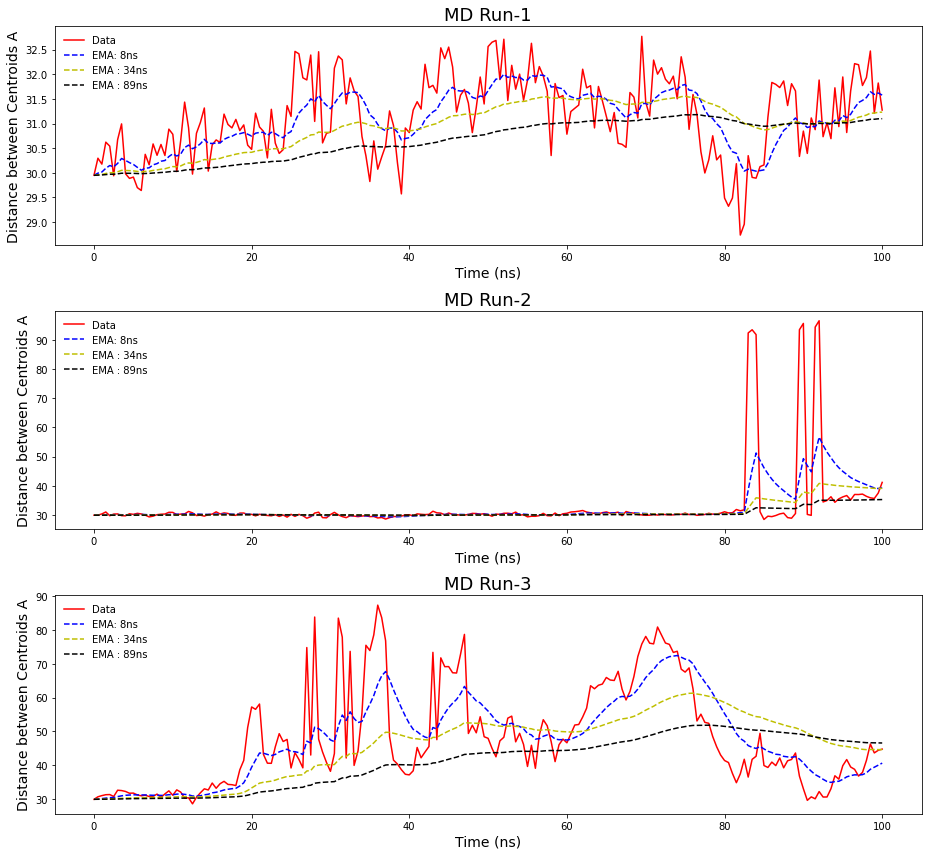

In [6]:
fig, ax = plt.subplots(figsize=(13,12), nrows=3, ncols=1)
plot_centroid_ts(df1,ax[0],ewa_md1_8,ewa_md1_34,ewa_md1_89,'MD Run-1')
plot_centroid_ts(df2,ax[1],ewa_md2_8,ewa_md2_34,ewa_md2_89,'MD Run-2')
plot_centroid_ts(df3,ax[2],ewa_md3_8,ewa_md3_34,ewa_md3_89,'MD Run-3')
plt.tight_layout()

# Possible Inferences
1. The Distance between the Centroids of the Protein and peptide seem to increase monotonically with time in both Run1 and Run3

2. In Run2, the distance seems to be constant until 80ns after which a sudden event occured that perhaps caused the peptide to fly away.

3. We will have to look at other plots, namely :
    - the evolution of radius of gyration with time
    - Pairwise RMSD plots 
    - Hydrogen Bond retention
    
To further access the situation in each scenario.

